In [27]:
import os
import pickle as pkl
import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [59]:
counts_df = pd.read_csv('gene_reads_2017-06-05_v8_skin_sun_exposed_lower_leg.csv').transpose()
counts_df.columns = counts_df.iloc[1]
counts_df = counts_df.drop(['id', 'Name', 'Description'], axis=0)
counts_df

Name,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
GTEX-111FC-0126-SM-5N9DL,0,252,0,0,0,0,0,1,2,1,...,1227462,0,1,1,274832,90370,36,769375,1,5
GTEX-111VG-2426-SM-5GZXD,0,90,0,0,1,1,0,0,1,6,...,760801,2,1,0,362764,159658,59,386846,0,3
GTEX-1122O-2126-SM-5EGIR,1,109,0,1,0,2,1,0,0,2,...,297730,0,0,1,82187,93295,71,236724,3,0
GTEX-1128S-2326-SM-5GZZY,0,226,0,0,0,0,1,3,4,9,...,1403449,0,0,0,714460,333079,135,778391,4,3
GTEX-113IC-0126-SM-5HL6T,0,169,0,0,0,1,1,0,0,2,...,666278,0,0,1,365130,170416,97,368904,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6-0226-SM-5NQ6T,0,125,0,0,0,1,1,0,0,0,...,678384,1,0,0,218579,74576,11,442641,0,0
GTEX-ZYW4-0126-SM-5E44A,0,59,0,1,0,1,0,1,0,2,...,719897,3,0,2,286931,123906,49,336253,3,3
GTEX-ZYY3-0126-SM-5GZY5,0,368,0,0,1,1,1,0,2,2,...,492174,1,2,1,218310,117402,71,301927,5,3
GTEX-ZZ64-1726-SM-5GZYB,0,251,0,0,0,0,1,0,0,6,...,794377,0,0,1,307862,123146,64,481667,0,3


In [60]:
counts_df['SUBJID'] = counts_df.index.str.split('-').str[0]+'-'+counts_df.index.str.split('-').str[1]
counts_df.set_index('SUBJID', inplace=True)
counts_df

Name,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
SUBJID,,,,,,,,,,,,,,,,,,,,,
GTEX-111FC,0,252,0,0,0,0,0,1,2,1,...,1227462,0,1,1,274832,90370,36,769375,1,5
GTEX-111VG,0,90,0,0,1,1,0,0,1,6,...,760801,2,1,0,362764,159658,59,386846,0,3
GTEX-1122O,1,109,0,1,0,2,1,0,0,2,...,297730,0,0,1,82187,93295,71,236724,3,0
GTEX-1128S,0,226,0,0,0,0,1,3,4,9,...,1403449,0,0,0,714460,333079,135,778391,4,3
GTEX-113IC,0,169,0,0,0,1,1,0,0,2,...,666278,0,0,1,365130,170416,97,368904,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6,0,125,0,0,0,1,1,0,0,0,...,678384,1,0,0,218579,74576,11,442641,0,0
GTEX-ZYW4,0,59,0,1,0,1,0,1,0,2,...,719897,3,0,2,286931,123906,49,336253,3,3
GTEX-ZYY3,0,368,0,0,1,1,1,0,2,2,...,492174,1,2,1,218310,117402,71,301927,5,3


In [61]:
metadata = pd.read_csv('GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt', sep='\t').set_index('SUBJID')
metadata

,SEX,AGE,DTHHRDY
SUBJID,,,
GTEX-1117F,2,60-69,4.0
GTEX-111CU,1,50-59,0.0
GTEX-111FC,1,60-69,1.0
GTEX-111VG,1,60-69,3.0
GTEX-111YS,1,60-69,0.0
...,...,...,...
GTEX-ZYY3,2,60-69,4.0
GTEX-ZZ64,1,20-29,0.0
GTEX-ZZPT,1,50-59,4.0


In [62]:
metadata = metadata.loc[metadata.index.intersection(counts_df.index)]
metadata

,SEX,AGE,DTHHRDY
SUBJID,,,
GTEX-111FC,1,60-69,1.0
GTEX-111VG,1,60-69,3.0
GTEX-1122O,2,60-69,0.0
GTEX-1128S,2,60-69,2.0
GTEX-113IC,1,60-69,NaN
...,...,...,...
GTEX-ZYT6,1,30-39,1.0
GTEX-ZYW4,1,60-69,3.0
GTEX-ZYY3,2,60-69,4.0


In [63]:
samples_to_keep = ~metadata.AGE.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [64]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="AGE",
    refit_cooks=True,
    inference=inference,
    n_cpus=8,
)

In [65]:
dds.deseq2()

Fitting size factors...
... done in 5.73 seconds.

Fitting dispersions...
... done in 67.26 seconds.

Fitting dispersion trend curve...
... done in 5.23 seconds.

Fitting MAP dispersions...
... done in 87.13 seconds.

Fitting LFCs...
... done in 42.38 seconds.

Calculating cook's distance...
... done in 4.62 seconds.

Replacing 1361 outlier genes.

Fitting dispersions...
... done in 3.37 seconds.

Fitting MAP dispersions...
... done in 2.34 seconds.

Fitting LFCs...
... done in 1.46 seconds.



In [66]:
print(dds.varm["dispersions"])

[ 2.04923455  0.17359432 60.71881883 ...  0.12149828  0.91863279
  0.85983311]


In [67]:
dds.varm["LFC"].to_csv('LFC.csv')

In [68]:
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Running Wald tests...
... done in 9.71 seconds.



Log2 fold change & Wald test p-value: AGE 30-39 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315        0.323173  0.565336  0.571648   
ENSG00000227232.5     214.545839        0.139526  0.113121  1.233429   
ENSG00000278267.1       0.049214       -0.288043  2.167903 -0.132867   
ENSG00000243485.5       0.515143        1.033888  0.533960  1.936267   
ENSG00000237613.2       0.221260       -0.062627  0.756028 -0.082837   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569        0.017794  0.142509  0.124862   
ENSG00000210194.1      66.732312        0.223484  0.189387  1.180036   
ENSG00000198727.2  504503.110650        0.047186  0.093396  0.505220   
ENSG00000210195.2       2.617516       -0.257660  0.308381 -0.835523   
ENSG00000210196.2       4.573010       -0.317349  0.277456 -1.143782   

      

In [69]:
results_df = stat_res.results_df
significant_genes = results_df[results_df['padj'] < 0.05]
significant_genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Name,,,,,,
ENSG00000116983.12,15.408081,-1.425131,0.344346,-4.138658,3.493433e-05,0.047359
ENSG00000163220.10,4093.540286,-1.720624,0.382094,-4.503143,6.695577e-06,0.022446
ENSG00000143546.9,1901.274884,-1.750716,0.396242,-4.418297,9.948157e-06,0.031127
ENSG00000184330.11,63.523156,-2.316462,0.492437,-4.704079,2.550141e-06,0.012708
ENSG00000163564.14,35.829538,0.830669,0.200177,4.149680,3.329409e-05,0.047352
ENSG00000116147.16,8.316820,-1.616957,0.384988,-4.200017,2.668953e-05,0.045493
ENSG00000133063.15,33.940307,1.748787,0.342405,5.107367,3.266785e-07,0.005111
ENSG00000233251.7,91.819841,0.680114,0.162386,4.188264,2.810958e-05,0.045493
ENSG00000066032.18,9.226048,-1.350321,0.298775,-4.519523,6.197905e-06,0.022376


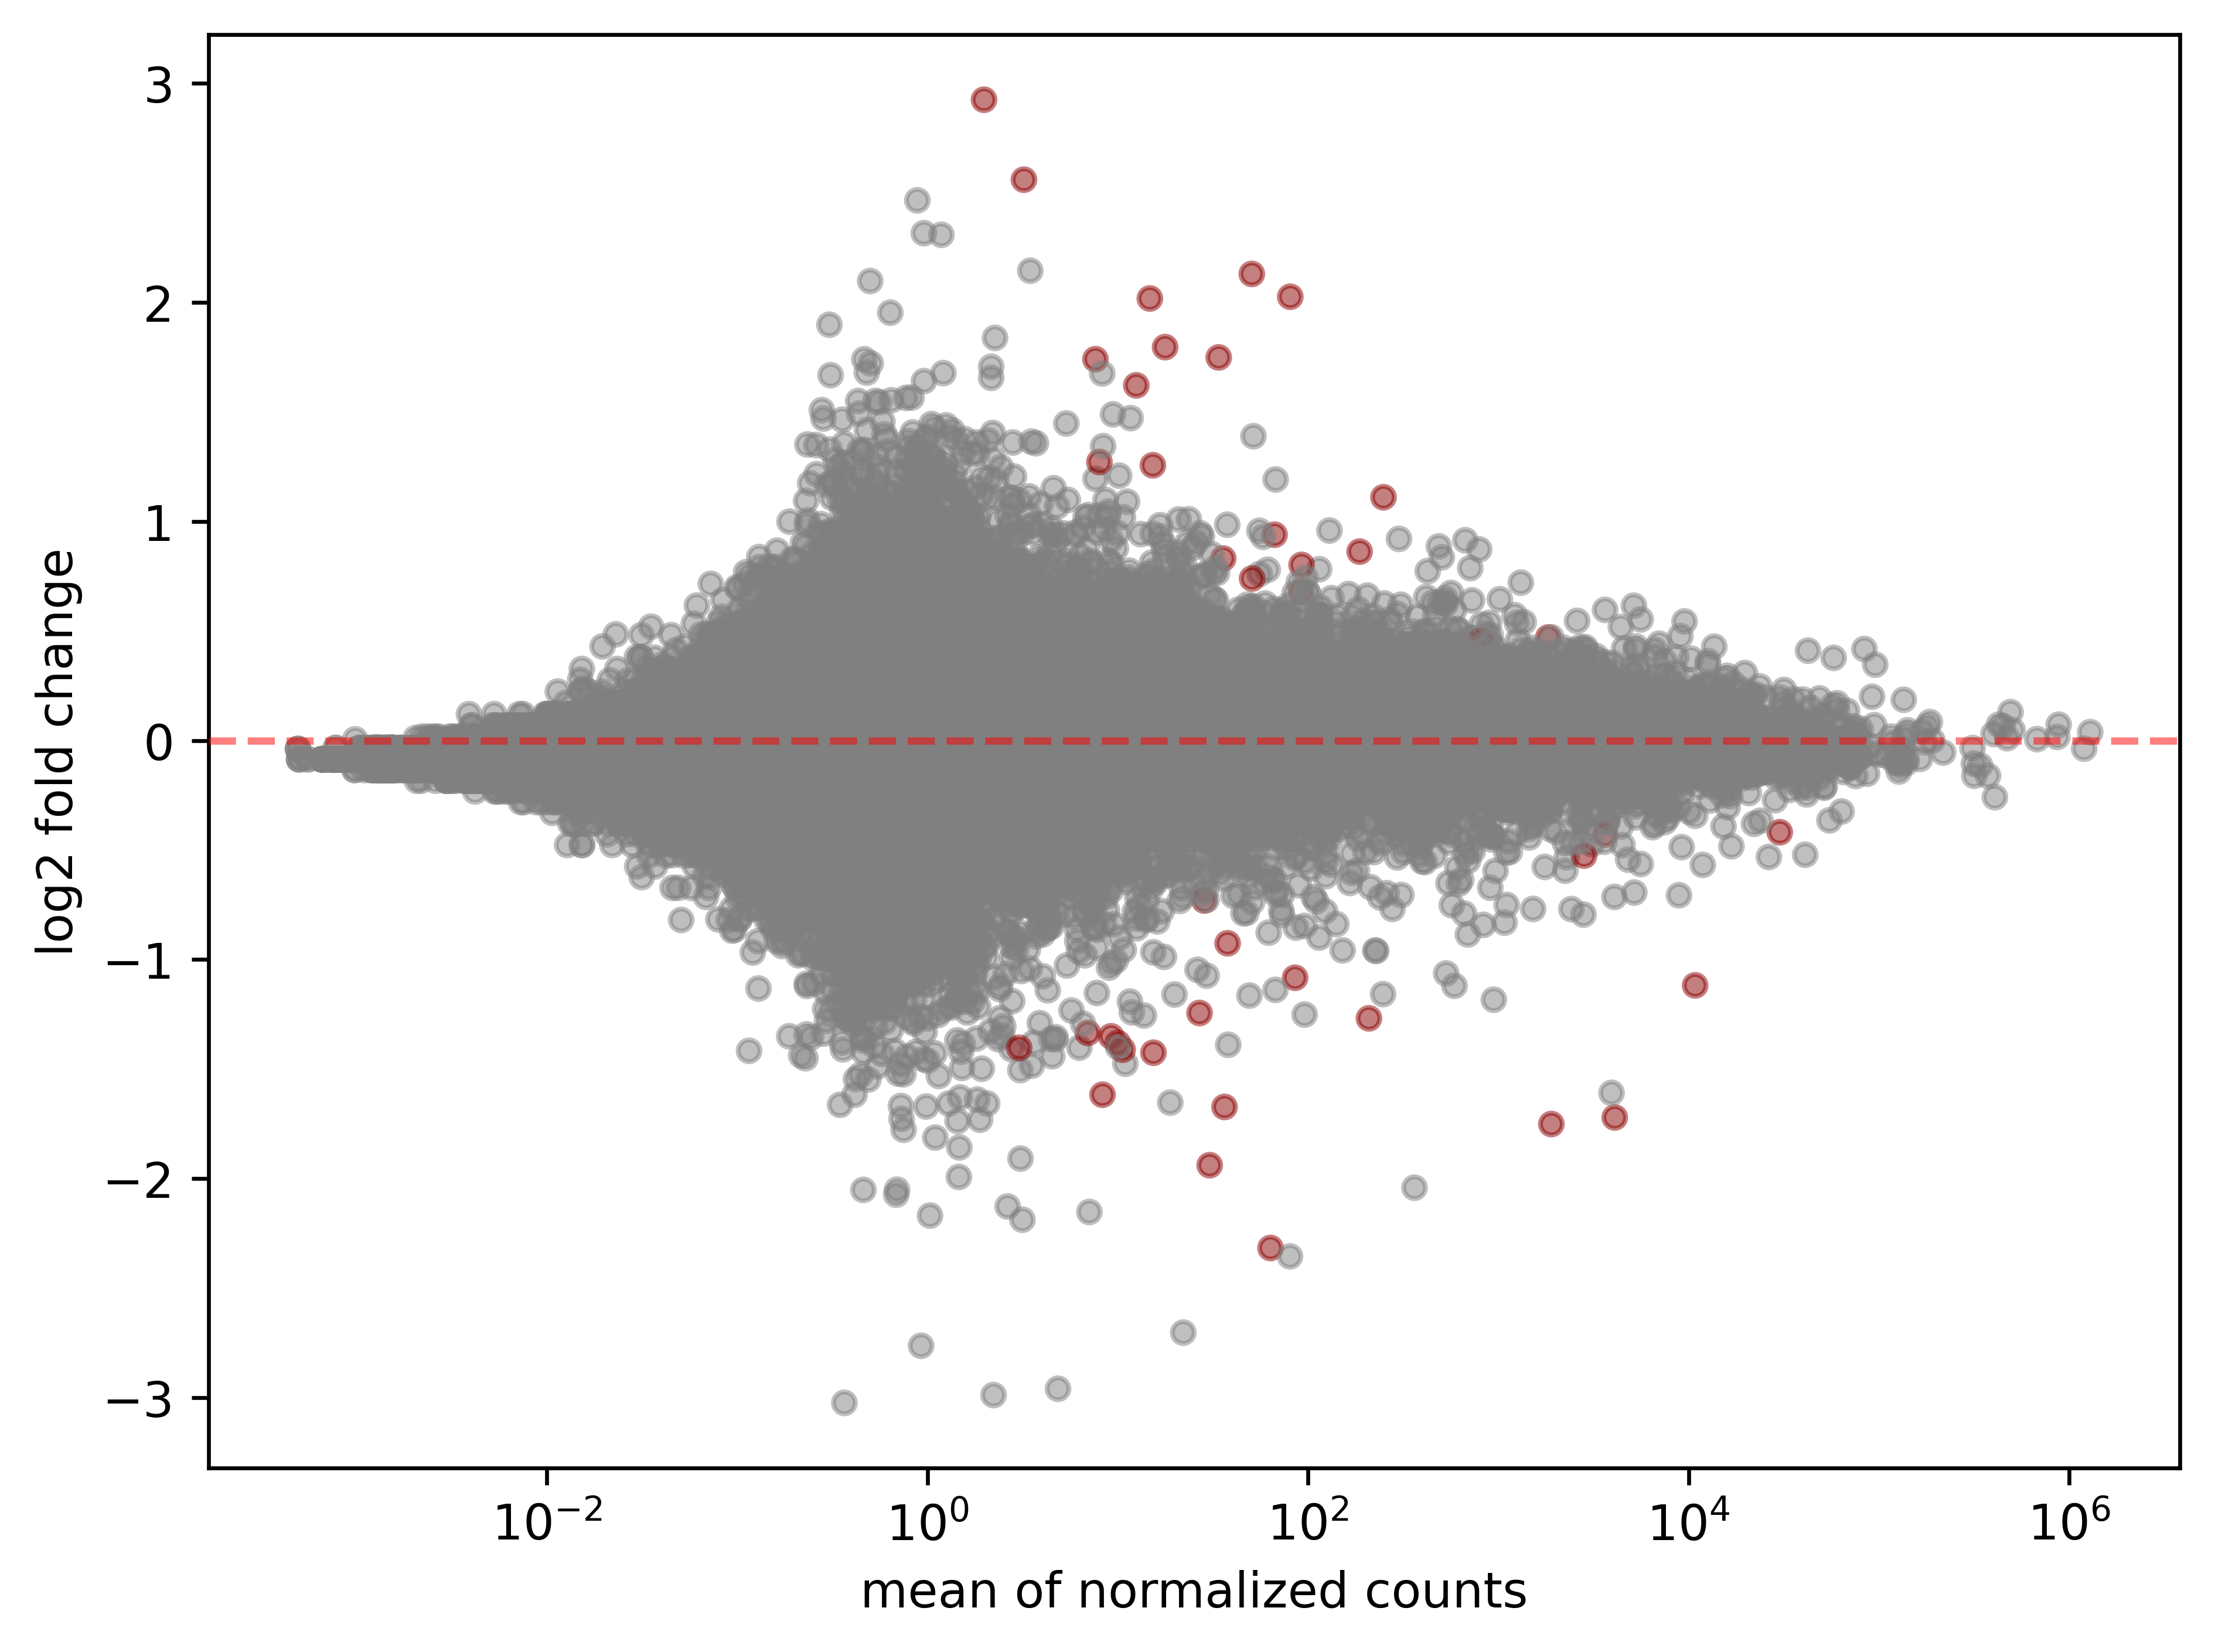

In [70]:
stat_res.plot_MA(s=20)